In [54]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt


# Вспомогательное
def load_data():
    x = []
    y = []
    _x = 0
    data = np.loadtxt("./lesson_3/FacebookCompanyStock.csv", delimiter=",", skiprows=1)[::-1]
    year = data[0][0]
    month = data[0][1]
    for row in data:
        if year != row[0] or month != row[1]:
            year = row[0]
            month = row[1]
            _x += 1
        x.append(_x)
        x.append(_x)
        y.append(row[3])
        y.append(row[4])
    x_arr = np.array(x)
    y_arr = np.array(y)
    return x_arr, y_arr

def point_cloud():
    x = []
    y = []
    for _x in range(100):
        for _y in range(0, 50, 10):
            x.append(_x)
            y.append(np.random.randint(_x*0.5 + _y - 20, _x*0.5 + _y))
    x_arr = np.array(x)
    y_arr = np.array(y)
    return x_arr, y_arr

points = point_cloud()
stock = load_data()



# Аппроксимация
Аппроксимация -- простыми словами приближение, это нахождение упрощенной функции g(x) от начальной более сложной функции, либо заданной в табличном виде f(x).

В отличие от интерполяции искомая функция не должна в обязательном порядке проходить через все узлы начальной функции.

<img alt="" src="lesson_3/aproximation.png" width="500" height="300"/>

Существует несколько методов аппроксимации. Самые известные из них метод наименьших квадратов, метод кривых Безье и метод В-сплайнов.

Рассмотрим наиболее популярный: метод наименьших квадратов.

Этот метод заключается в нахождении минимальной суммы всех отклонений искомой функции g(x) от начальной функции f(x).

$$\Large \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - f(x_i))^2 \to \min_x$$

Т.к. каждое значение $\Large x_i$ в общем случае «сопровождается» соответствующим коэффициентом
$\Large а_i $ (i = 0, 1, 2, …, n), то задача сводится к нахождению данных коэффициентов.
Введем обозначение функции:

$$\Large F(a_0, a_1, ..., a_n) = \sum_{i=1}^n (y_i - f(x_i))^2$$

Тогда, на основе обращения в точке минимума функции F в нуль ее производных, для определения вышеупомянутых коэффициентов составляется нормальная система:

$$\Large
\begin{cases}
\frac {dF} {da_0} = 0;
\\
\frac {dF} {da_1} = 0;
\\
...
\\
\frac {dF} {da_n} = 0.
\\
\end{cases}
$$

Рассмотрим наиболее простой вид аппроксимации: линейную аппроксимацию.

Простыми словами мы ищем такую прямую f(x), у которой сумма отклонений всех точек от начальной функции будет наименьшей. Для этого необходимо определить параметры а и b линейной функции $\Large P(x)=a \cdot x + b$

<img alt="" src="lesson_3/aproximation2.png" width="300" height="300"/>

Формулы для расчета коэффициентов a и b определяются по методу наименьших квадратов:

$\Large F = \sum_{i=1}^n (y_i - a \cdot x_i - b) \rightarrow min$

Для решения  составляется система из двух уравнений с двумя неизвестными:

$$\Large
\begin{cases}
\frac {dF} {da} = 0;
\\
\frac {dF} {db} = 0;
\end{cases}
$$

Подставим функцию для поиска наименьших квадратов и проведя математические преобразования получим следующие итоговые формулы для коэффициентов а и b.

$$\Large
a = \frac
{n \cdot \sum_{i=1}^n (x_i \cdot y_i) - \sum_{i=1}^n x_i \cdot \sum_{i=1}^n y_i}
{n \cdot \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}
$$,
$$\Large
b = \frac
{ \sum_{i=1}^n y_i - a \cdot \sum_{i=1}^n x_i }
{n} =
\frac
{ \sum_{i=1}^n y_i \cdot \sum_{i=1}^n x_i^2 - \sum_{i=1}^n x_i \cdot \sum_{i=1}^n (x_i \cdot y_i)}
{n \cdot \sum_{i=1}^n x_i^2 - (\sum_{i=1}^n x_i)^2}
$$.

Например:

Дана табличная зависимость мощности N токарно-винторезных станков от максимального диаметра обрабатываемой заготовки d, устанавливаемой над станиной, для десяти моделей

<img alt="" src="lesson_3/table.png" width="800" height="100"/>

Требуется найти мощность проектируемого токарно-винторезного станка для обработки заготовки максимального диаметра 700 мм. Построим область значений распределения данных:

<img alt="" src="lesson_3/table2.png" width="500" height="300"/>

Для нахождения эмпирической зависимости, описывающей изменение данных, можно воспользоваться методом линейной аппроксимации.

Для удобства перепишем вышеприведенные формулы


$$\Large
 a = \frac{10 \cdot \sum_{i=1}^{10}(d_i \cdot N_i) - \sum_{i=1}^{10}d_i \cdot \sum_{i=1}^{10}N_i}{10 \cdot\sum_{i=1}^{10} d_i^2 - (\sum_{i=1}^{10} d_i)^2} $$

$$ \Large
b = \frac{\sum_{i=1}^{10} N_i - a\sum_{i=1}^{10}d_i}{10} $$

Найдем значения коэффициентов: $\Large а = 0,032, b= –6,62 $.

Уравнение прямой для данного примера примет вид $\Large N(d) = 0,032 \cdot d – 6,62$.
Подставив в последнее выражение значение диаметра 700 мм, получим значение мощности проектируемого станка –- $\Large N = 15,78 кВт$.
Проведя аппроксимирующую функцию (прямую), можно убедиться в правильности решения:

<img alt="" src="lesson_3/table3.png" width="500" height="300"/>

### Аппроксимация в Numpy

Ниже приведён пример аппроксимации с использованием готовой функции из библиотеки `numpy`

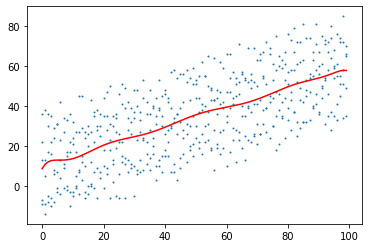

In [72]:
coefs = np.polyfit(points[0], points[1], 10)
poly = np.poly1d(coefs)
plt.scatter(points[0], points[1], s=1)
plt.plot(points[0], poly(points[0]), c="red")
plt.show()


## Одномерная оптимизация

Задача оптимизации – одна из важнейших составляющих многих инженерных и научных задач.
Найти оптимальное решение – означает найти наилучшую комбинацию входных переменных из всех возможных.
При решении задачи  оптимизации рассматривается некоторая функция, называемая __целевой__,
и аргументы, называемые __параметрами оптимизации__.

Цель оптимизации - найти такие входные параметры для функции, при которых значение функции __минимально__

(также можно найти максимум функции, просто условная функция f(x) заменяется на -f(x))

По количеству независимых переменных различают задачи одномерной оптимизации (n=1) и многомерной оптимизации (n >= 2).
Сегодня мы рассмотрим некоторые методы одномерной оптимизации



### Метод прямого перебора с переменным шагом
Суть его заключается в следующем: от начальной точки интервала неопределенности [a,b]
(это интервал, на котором мы предполагаем должен находится минимум)
двигаются с начальным шагом h до тех пор, пока функция в точках разбиения уменьшается.

Если функция в очередной точке стала возрастать, то происходит  сужение интервала неопределенности путем возврата от рассматриваемой
(которая становится правой границей нового интервала) точки x на два шага назад.

При этом левой границей нового отрезка неопределенности станет точка a=x-2h, а правой b=x.

Новый отрезок вновь исследуют таким же образом, но уже с шагом, уменьшенным в два раза h=h/2. Процесс повторяется до тех пор, пока
отрезок неопределенности не станет сопоставимым с заданной точностью.

<img height="300" src="lesson_3/shag.png" width="400"/>

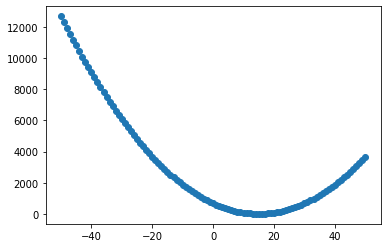

In [74]:
def f(x):
    return 3*((x-15)**2)+8

x = np.arange(-50,51)
y = f(x)
plt.scatter(x,y)

In [77]:
def var_step(function,a0,b0,h0,eps):
    a = a0
    b = b0
    h = h0

    last_y = function(a0)

    i = 0

    while b-a > eps:
        print(f"Step #{i}\tA: {a}\tB: {b}\t H: {h}")
        i += 1
        if function(a+h) > function(a):
            b = a+h
            h = h/2
            continue
        a = a+h


    # Вернем как минимальный x, так и минимальное значение функции
    return a,function(a)

print(var_step(f,-20,20,5,1))

Step #0	A: -20	B: 20	 H: 5
Step #1	A: -15	B: 20	 H: 5
Step #2	A: -10	B: 20	 H: 5
Step #3	A: -5	B: 20	 H: 5
Step #4	A: 0	B: 20	 H: 5
Step #5	A: 5	B: 20	 H: 5
Step #6	A: 10	B: 20	 H: 5
Step #7	A: 15	B: 20	 H: 5
Step #8	A: 15	B: 20	 H: 2.5
Step #9	A: 15	B: 17.5	 H: 1.25
Step #10	A: 15	B: 16.25	 H: 0.625
(15, 8)


Однако данный метод не очень эффективен в решении основной проблемы, с которой сталкиваются при решении задачи оптимизации - это нахождение __глобального__ минимума.
Дело в том, что у функции может быть несколько локальных минимумов, но глобальный всегда один.

<img height="300" src="lesson_3/localmin.png" width="400"/>

Для нахождения именно глобального минимума можно менять гиперпараметры метода (начало и конец отрезка, шаг), или применить другой метод, например метод золотого сечения.

### Метод золотого сечения
В основу метода положено разбиение отрезка неопределенности [a;b] в соотношении золотого сечения,
такого, что отношение длины его большей части ко всей длине отрезка равно отношению длины его меньшей части к длине его большей части (суть золотого сечения).

### Найдем коэффициенты золотого сечения:

<img height="500" src="lesson_3/goldvis.png" width="800"/>

Затем нам необходимо поставить две точки на интересующий нас отрезок так, чтобы они делили его в соотношении золотого сечения справа (x1) и слева (x2).

<img height="150" src="lesson_3/goldsplit.png" width="400"/>

После этого нам необходимо сравнить значения функции в этих двух точках, и если f(x1) > f(x2), то тогда x1
становится новой границой a искомого отрезка [a,b], а если f(x1) < f(x2), то тогда "двигается" точка b в точку x2.

Также как и в прошлом методе, поиск минимального значения происходит до тех пор, пока отрезок не станет
меньше эпсилон - заданной точности.

Можно заметить, что точка x1 осуществляет золотое сечение не только отрезка [a,b], но и отрезка [a,x2].

Также точка x2 осуществляет золотое сечение отрезка [a,b] и отрезка [x1,b].

В этом и заключается большое преимущество метода - при сравнениии значений функций в точках x1 и x2, мы
будем смещать в одну из точек границу рассматриваемого отрезка неопределенности, и в новом отрезке нам уже будет известно значение функции в одной из двух рассматриваемых точек на следующем шаге.

In [13]:
GOLDEN_RATIO = 0.618

def gold(a0, b0, eps):
    n = 1
    k2 = (np.sqrt(5) - 1) / 2
    k1 = 1 - k2

    x1, x2 = a0 + k1 * (b0 - a0), a0 + k2 * (b0 - a0)
    d0 = b0 - a0
    d = GOLDEN_RATIO * d0

    f1, f2 = f(x1), f(x2)

    while (b0 - a0) > eps:
        print(f"N:{n}\t\tA:{round(a0,4)}\t\tB:{round(b0,4)}\t\tx1:{round(x1,4)}\t\tx2:{round(x2,4)}\t\tf1:{round(f1,4)}\t\tf2:{round(f2,4)}\t\td: {round(d,4)}")
        if f1 < f2:
            b0 = x2
            x2 = x1
            f2 = f1
            x1 = a0 + k1 * (b0 - a0)
            f1 = f(x1)
        else:
            a0 = x1
            x1 = x2
            f1 = f2
            x2 = a0 + k2 * (b0 - a0)
            f2 = f(x2)
        n += 1
        d *= GOLDEN_RATIO
    x1 = (b0 + a0) / 2
    f1 = f(x1)
    return x1,f1



print(gold(-20, 20, 1))

NameError: name 'f' is not defined


# Что дальше ?

- Частная производная
- Многомерная оптимизация


# Домашнее задание

1. Есть данные о цене акций (цена открытия, минимальная, максимальная и цена закрытия) компании Фейсбук (ещё Фейсбук) за 71 месяц, начиная с 05.2012.
   За каждый месяц есть несколько различных значений.
   Необходимо построить график цены в зависимости от месяца (провести аппроксимацию на основе минимальной и максимальной цены).
2. Используя результат аппроксимации из предыдущего задания, определите минимальную стоимость акции за весь интервал времени.
3. Изучите возможности `scipy` по одномерной оптимизации.

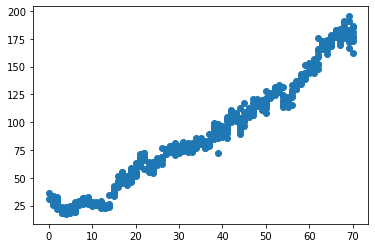

In [12]:
plt.scatter(stock[0], stock[1])

In [43]:
# using linear model
# y = a * x + b

class ApproximiationLinearModel:

    def __init__(self, x, y):
        self.x, self.y = x, y

    def getModel(self):
        return lambda x : x * self._getA() + self._getB()

    def _getA(self):
        x, y = sum(self.x), sum(self.y)
        n = len(self.x)
        return (n * sum(self.x[i] * self.y[i] for i in range(n)) - x * y) /\
               (n * sum(i * i for i in self.x) - x * x)

    def _getB(self):
        return (sum(self.y) - self._getA() * sum(self.x)) / len(self.x)

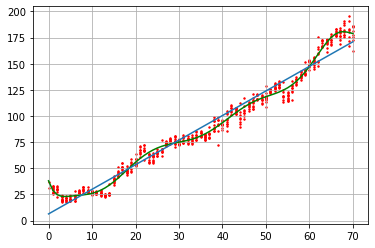

In [59]:
# data
x, y = stock[0], stock[1]

# my realization
model = ApproximiationLinearModel(x, y)
func = model.getModel()

# numpy polyfit
coefs = np.polyfit(x, y, 10)
poly = np.poly1d(coefs)

#scipy
# don't understand


# visualize
plt.plot(x, poly(x), c="green")
plt.plot(x, func(x))
plt.scatter(x, y, s=2, c="red")
plt.grid()
plt.show()

In [50]:
# second task
min(poly(x))

23.03437165814622